# Large Datasets with pandas

In [1]:
# %% Load Data

import pandas as pd

In [2]:
# /content/yellow_tripdata_2021-02.parquet

file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [3]:
# %% Measure Memory

mb = 1_000_000
df.memory_usage(deep=True).sum() / mb

np.float64(282.308734)

In [4]:
# %% File Size
from pathlib import Path

Path(file_name).stat().st_size / mb

33.730552

In [5]:
# %% Calculate median distance by VendorID

df.groupby('VendorID')['trip_distance'].median()

,trip_distance
VendorID,
1,1.60
2,1.74


In [6]:
# %%
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
# %% Load subset of columns

columns=['VendorID', 'trip_distance']
df = pd.read_parquet(file_name, columns=columns)
df.memory_usage(deep=True).sum() / mb

np.float64(32.592408)

In [8]:
# %% Calculate median distance by VendorID
df.groupby('VendorID')['trip_distance'].median()

,trip_distance
VendorID,
1,1.60
2,1.74


In [11]:
file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [12]:
# %% Look at types
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,int64


In [13]:
# %% Data range
df['total_amount'].describe()

,total_amount
count,1.358017e+06
mean,1.743016e+01
std,1.455326e+01
min,-6.348000e+02
25%,1.100000e+01
50%,1.415000e+01
75%,1.930000e+01
max,6.969300e+03


In [14]:
# %% float32 range
import numpy as np

In [15]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [16]:
# %% Smaller Size

mb = 1_000_000
df['total_amount'].memory_usage(deep=True) / mb

21.728272

In [17]:
# %% Original Size

amount = df['total_amount'].astype(np.float32)
amount.memory_usage(deep=True) / mb
# %%

16.296204

In [ ]:
# categorical

In [20]:
file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [21]:
# %% Convert to names
names = {
    1: 'Creative',
    2: 'VeriFone',
}
df['vendor'] = df['VendorID'].map(names)

In [22]:
# %% Measure Memory

mb = 1_000_000
id_size = df['VendorID'].memory_usage(deep=True) / mb
name_size = df['vendor'].memory_usage(deep=True) / mb
print(f'id size: {id_size}, name size: {name_size}')

id size: 21.728272, name size: 99.135241


In [23]:
# %% Convert to categorical
df['vendor'] = df['vendor'].astype('category')
df['vendor'].memory_usage(deep=True) / mb

12.222391

In [24]:
# %% Categorical
df['vendor'][:10]

,vendor
0,Creative
1,Creative
2,Creative
3,VeriFone
4,VeriFone
5,VeriFone
6,Creative
7,VeriFone
8,Creative
9,Creative


In [25]:
# %% Filter
len(df[df['vendor'] == 'VeriFone'])

932127

## PyArrow - from Apache Arrow Project

In future replacement of Numpy

https://arrow.apache.org/docs/python/index.html

In [26]:
file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [27]:
# %% Size
mb = 1_000_000
df.memory_usage(deep=True).sum() / mb

np.float64(282.308734)

In [29]:
# %% Arrow backend
df = pd.read_parquet(file_name, dtype_backend='pyarrow')
df.memory_usage(deep=True).sum() / mb

np.float64(216.519175)

In [30]:
# %% Convert to names
names = {
    1: 'Creative',
    2: 'VeriFone',
}
df['vendor'] = df['VendorID'].map(names)
df['vendor'].memory_usage(deep=True) / mb

99.304994

In [31]:
# %% Arrow string
df['vendor'] = df['vendor'].astype('string[pyarrow]')
df['vendor'].memory_usage(deep=True) / mb

32.762161

# Task:

Daily Passengers Calculate how many passengers rode each day. Use as little memory as you can.

In [32]:
# %%
import pandas as pd

file_name = '/content/yellow_tripdata_2021-02.parquet'
columns=['tpep_pickup_datetime', 'passenger_count']
df = pd.read_parquet(file_name, columns=columns)
df.groupby(df['tpep_pickup_datetime'].dt.round('D'))['passenger_count'].sum()


,passenger_count
tpep_pickup_datetime,
2009-01-01,23.0
2009-01-02,3.0
2021-02-01,4198.0
2021-02-02,12987.0
2021-02-03,51339.0
2021-02-04,72312.0
2021-02-05,74830.0
2021-02-06,67678.0
2021-02-07,63535.0


# Chunks

In [34]:

import pyarrow.parquet as pq

file_name = '/content/yellow_tripdata_2021-02.parquet'
total, count = 0, 0
for batch in pq.ParquetFile(file_name).iter_batches(batch_size=10_000):
    total += batch['total_amount'].sum().as_py()
    count += len(batch)

print('average total_amount:', total / count)

average total_amount: 17.430162899286227


In [36]:
# %%
import sqlite3
import pandas as pd

db_file = '/content/yellow_tripdata_2021-02.db'
query_sql = '''
SELECT VendorID, SUM(total_amount) AS Revenue
FROM rides
GROUP BY VendorID
'''

conn = sqlite3.connect(db_file)
df = pd.read_sql(query_sql, conn)
df

,VendorID,Revenue
0,1,1.416916e+06
1,2,3.317376e+06


<Axes: >

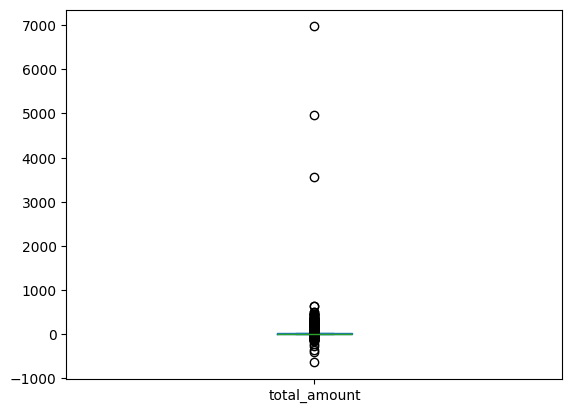

In [38]:
# faster

import pandas as pd

file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)
df['total_amount'].plot.box()

In [39]:
# %%
total_med = df['total_amount'].median()
total_med

14.15

In [40]:
# %%
def norm_total(value):
  if value <= 0 or value > 1000:
    return total_med
  return value

In [41]:
# %%
%timeit df['total_amount'].apply(norm_total)

The slowest run took 6.00 times longer than the fastest. This could mean that an intermediate result is being cached.
958 ms ± 617 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
# %%
import numba

@numba.vectorize
def norm_total_numba(value):
  if value <= 0 or value > 1000:
    return total_med
  return value

In [44]:
df = pd.read_parquet(file_name)

In [45]:
%%timeit
values = df['total_amount'].to_numpy()
norm_total_numba(values)

2.06 ms ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Task:

For each VendorID, what is the maximal number of passengers in a ride?
Load at most 10,000 rows to memory.

In [46]:
# %%
import pyarrow.parquet as pq

file_name = '/content/yellow_tripdata_2021-02.parquet'
counts = {}  # VendorID -> count
columns = ['VendorID', 'passenger_count']
for batch in pq.ParquetFile(file_name).iter_batches(batch_size=10_000, columns=columns):
    for i in range(len(batch)):
        vid = batch['VendorID'][i]
        count = batch['passenger_count'][i].as_py()

        if count is None:
            continue

        count = int(count)
        if count > counts.get(vid, 0):
            counts[vid] = count

for vid, count in counts.items():
    print(f'{vid} -> {count}')


1 -> 6
2 -> 9


# Dask

https://coiled.io/ </br>
https://www.dask.org/


In [3]:
import pandas as pd
import dask.dataframe as ddf

In [5]:
file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [6]:
# %% Maximal tip in percentage where payment is in cash
cash = df[df['payment_type'] == 2]
tip_pct = cash['tip_amount'] / cash['total_amount']
max_tip = tip_pct.max()
max_tip

0.16666666666666669

In [7]:
import polars as pl


In [8]:
file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pd.read_parquet(file_name)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-02-01 00:40:47,2021-02-01 00:48:28,1.0,2.30,1.0,N,141,226,2,8.50,3.00,0.5,0.00,0.00,0.3,12.30,2.5,NaN
1,1,2021-02-01 00:07:44,2021-02-01 00:20:31,1.0,1.60,1.0,N,43,263,2,9.50,3.00,0.5,0.00,0.00,0.3,13.30,0.0,NaN
2,1,2021-02-01 00:59:36,2021-02-01 01:24:13,1.0,5.30,1.0,N,114,263,2,19.00,3.00,0.5,0.00,0.00,0.3,22.80,2.5,NaN
3,2,2021-02-01 00:03:26,2021-02-01 00:16:32,1.0,2.79,1.0,N,236,229,1,11.00,0.50,0.5,2.96,0.00,0.3,17.76,2.5,NaN
4,2,2021-02-01 00:20:20,2021-02-01 00:24:03,2.0,0.64,1.0,N,229,140,1,4.50,0.50,0.5,1.66,0.00,0.3,9.96,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371703,2,2021-02-28 23:25:41,2021-02-28 23:42:35,NaN,8.84,NaN,None,141,160,0,36.83,2.75,0.5,0.00,6.12,0.3,46.50,NaN,NaN
1371705,2,2021-02-28 23:27:00,2021-02-28 23:41:00,NaN,4.42,NaN,None,68,24,0,17.14,0.00,0.5,4.33,0.00,0.3,24.77,NaN,NaN
1371706,2,2021-02-28 23:18:05,2021-02-28 23:26:48,NaN,1.50,NaN,None,68,137,0,9.46,0.00,0.5,2.64,0.00,0.3,15.40,NaN,NaN
1371707,2,2021-02-28 23:41:07,2021-03-01 00:13:44,NaN,15.30,NaN,None,113,254,0,59.15,2.75,0.5,0.00,0.00,0.3,62.70,NaN,NaN


In [10]:
# df.memory_usage(deep=True).sum() / 1_000_000

AttributeError: 'DataFrame' object has no attribute 'memory_usage'

In [9]:
df = pl.read_parquet(file_name)
df.estimated_size(unit='mb')

198.7181272506714

In [11]:
%%timeit
df.group_by('VendorID').agg(
    pl.sum('total_amount')
).sort(
    pl.col('VendorID')
)

21.2 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# %%timeit
# pd_df.groupby('VendorID')['total_amount'].sum().sort_values()


# Task

Using polars, find out what is the median distance for rides with more than one passenger.


In [15]:
import polars as pl

file_name = '/content/yellow_tripdata_2021-02.parquet'
df = pl.read_parquet(file_name)
df = df.filter(pl.col('passenger_count') > 1)
df.select(pl.median('trip_distance'))


trip_distance
f64
1.66
